In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import plotly.express as px
import os
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**imported some usefull libraries which makes our job easy**

In [2]:
data_set = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')

**Download the dataset**

In [3]:
data_set

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [4]:
data_set.Podcast_Name.nunique()


48

In [5]:
data_set.Episode_Title.nunique()

100

In [6]:
data_set.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


Does some analysis on data using describe()

In [7]:
data_set.Genre.nunique()

10

In [8]:
test_inputs = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')

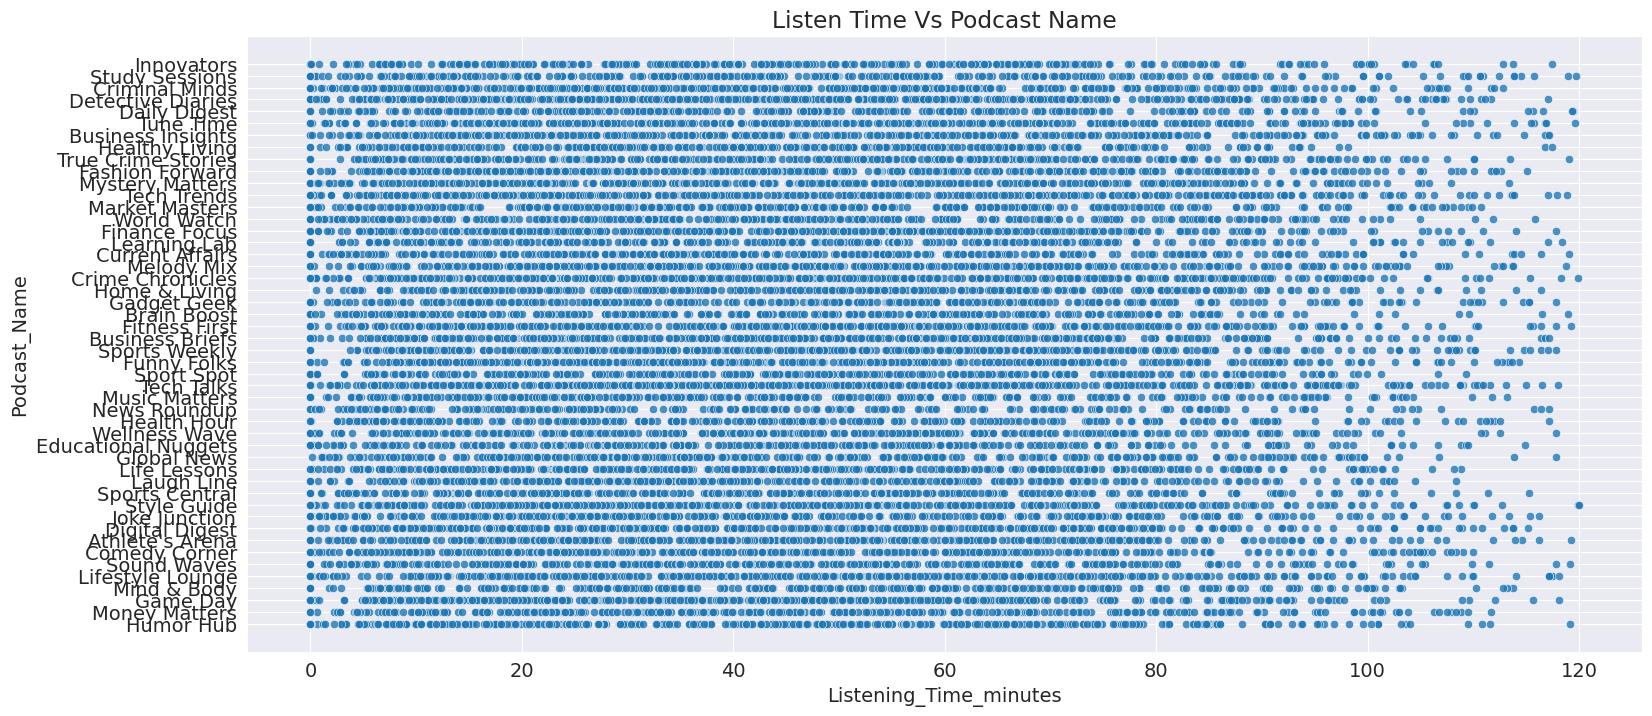

In [9]:
plt.figure(figsize=(18,8))
temp_df = data_set.sample(20000)
sns.scatterplot(x=temp_df.Listening_Time_minutes, y=temp_df.Podcast_Name,  alpha=0.8)
plt.title('Listen Time Vs Podcast Name')
plt.show()

In [10]:
train_size = int(0.8*(len(data_set)))
train_size

600000

setting the train and validation set size

In [11]:
train_df, val_df = data_set[:train_size],data_set[train_size:]

In [12]:
len(train_df), len(val_df)

(600000, 150000)

In [13]:
input_cols = list(train_df.columns)[:-1]
target_col = 'Listening_Time_minutes'

**taking columns from data that are useful to predict the target**

In [14]:
input_cols

['id',
 'Podcast_Name',
 'Episode_Title',
 'Episode_Length_minutes',
 'Genre',
 'Host_Popularity_percentage',
 'Publication_Day',
 'Publication_Time',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Episode_Sentiment']

In [15]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [16]:
train_targets

0         31.41998
1         88.01241
2         44.92531
3         46.27824
4         75.61031
            ...   
599995    18.51939
599996    30.51473
599997    54.11717
599998    24.62000
599999    53.57881
Name: Listening_Time_minutes, Length: 600000, dtype: float64

In [17]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [18]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

extracting the numeric columns and categorical columns...this is done so that we can perform some preprocessing if needed

In [19]:
numeric_cols

['id',
 'Episode_Length_minutes',
 'Host_Popularity_percentage',
 'Guest_Popularity_percentage',
 'Number_of_Ads']

In [20]:
categorical_cols

['Podcast_Name',
 'Episode_Title',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [21]:
test_inputs.columns.isna().sum()

0

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
imputer = SimpleImputer(strategy='mean').fit(data_set[numeric_cols])

In [24]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

Using simple imputer, we have fixed the missing values with **mean strategy**

In [25]:
train_inputs[numeric_cols].isna().sum()

id                             0
Episode_Length_minutes         0
Host_Popularity_percentage     0
Guest_Popularity_percentage    0
Number_of_Ads                  0
dtype: int64

check if still there are any null values

In [26]:
train_inputs[numeric_cols]

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
0,0.0,64.504738,74.81,52.236449,0.0
1,1.0,119.800000,66.95,75.950000,2.0
2,2.0,73.900000,69.97,8.970000,0.0
3,3.0,67.170000,57.22,78.700000,2.0
4,4.0,110.510000,80.07,58.680000,3.0
...,...,...,...,...,...
599995,599995.0,31.170000,85.71,8.680000,1.0
599996,599996.0,64.504738,93.00,28.550000,1.0
599997,599997.0,105.730000,81.66,71.480000,3.0
599998,599998.0,31.000000,99.08,78.060000,2.0


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler().fit(data_set[numeric_cols])

In [29]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

MinMaxScaler is used to make the data look simple in smaller values between **-1 to 1** range

In [30]:
train_inputs

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,0.000000,Mystery Matters,Episode 98,0.198330,True Crime,0.622123,Thursday,Night,0.435630,0.000000,Positive
1,0.000001,Joke Junction,Episode 26,0.368343,Comedy,0.555603,Saturday,Afternoon,0.633392,0.019247,Negative
2,0.000003,Study Sessions,Episode 16,0.227217,Education,0.581161,Tuesday,Evening,0.074806,0.000000,Negative
3,0.000004,Digital Digest,Episode 45,0.206524,Technology,0.473257,Monday,Morning,0.656326,0.019247,Positive
4,0.000005,Mind & Body,Episode 86,0.339780,Health,0.666638,Monday,Afternoon,0.489367,0.028871,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
599995,0.799994,Detective Diaries,Episode 82,0.095837,True Crime,0.714370,Monday,Afternoon,0.072388,0.009624,Positive
599996,0.799996,Fitness First,Episode 79,0.198330,Health,0.776066,Saturday,Evening,0.238095,0.009624,Negative
599997,0.799997,Mind & Body,Episode 35,0.325083,Health,0.680095,Wednesday,Morning,0.596114,0.028871,Neutral
599998,0.799998,Style Guide,Episode 71,0.095314,Lifestyle,0.827522,Friday,Morning,0.650988,0.019247,Negative


In [31]:
test_inputs

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,1.000001,Educational Nuggets,Episode 73,0.242775,Education,0.311527,Saturday,Evening,0.444750,0.009624,Neutral
1,1.000003,Sound Waves,Episode 23,0.085691,Music,0.592332,Sunday,Morning,0.435630,0.000000,Neutral
2,1.000004,Joke Junction,Episode 11,0.212458,Comedy,0.563558,Friday,Evening,0.813193,0.000000,Positive
3,1.000005,Comedy Corner,Episode 73,0.354784,Comedy,0.187035,Sunday,Morning,0.431574,0.019247,Positive
4,1.000007,Life Lessons,Episode 50,0.222359,Lifestyle,0.480704,Wednesday,Morning,0.094237,0.019247,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
249995,1.333328,Mind & Body,Episode 100,0.064721,Health,0.545616,Saturday,Evening,0.803936,0.028871,Negative
249996,1.333330,Joke Junction,Episode 85,0.262883,Comedy,0.339963,Saturday,Night,0.254524,0.019247,Negative
249997,1.333331,Joke Junction,Episode 63,0.037234,Comedy,0.208362,Thursday,Evening,0.614544,0.009624,Neutral
249998,1.333332,Market Masters,Episode 46,0.348850,Business,0.356889,Friday,Night,0.780502,0.028871,Positive


In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [34]:
encoder.fit(data_set[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

**encoder** is used to process the categorical data, so that their data also in numbers which helps to boost our model while training

In [35]:
encoder.categories_

[array(["Athlete's Arena", 'Brain Boost', 'Business Briefs',
        'Business Insights', 'Comedy Corner', 'Crime Chronicles',
        'Criminal Minds', 'Current Affairs', 'Daily Digest',
        'Detective Diaries', 'Digital Digest', 'Educational Nuggets',
        'Fashion Forward', 'Finance Focus', 'Fitness First', 'Funny Folks',
        'Gadget Geek', 'Game Day', 'Global News', 'Health Hour',
        'Healthy Living', 'Home & Living', 'Humor Hub', 'Innovators',
        'Joke Junction', 'Laugh Line', 'Learning Lab', 'Life Lessons',
        'Lifestyle Lounge', 'Market Masters', 'Melody Mix', 'Mind & Body',
        'Money Matters', 'Music Matters', 'Mystery Matters',
        'News Roundup', 'Sound Waves', 'Sport Spot', 'Sports Central',
        'Sports Weekly', 'Study Sessions', 'Style Guide', 'Tech Talks',
        'Tech Trends', 'True Crime Stories', 'Tune Time', 'Wellness Wave',
        'World Watch'], dtype=object),
 array(['Episode 1', 'Episode 10', 'Episode 100', 'Episode 11',
   

In [36]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

["Podcast_Name_Athlete's Arena",
 'Podcast_Name_Brain Boost',
 'Podcast_Name_Business Briefs',
 'Podcast_Name_Business Insights',
 'Podcast_Name_Comedy Corner',
 'Podcast_Name_Crime Chronicles',
 'Podcast_Name_Criminal Minds',
 'Podcast_Name_Current Affairs',
 'Podcast_Name_Daily Digest',
 'Podcast_Name_Detective Diaries',
 'Podcast_Name_Digital Digest',
 'Podcast_Name_Educational Nuggets',
 'Podcast_Name_Fashion Forward',
 'Podcast_Name_Finance Focus',
 'Podcast_Name_Fitness First',
 'Podcast_Name_Funny Folks',
 'Podcast_Name_Gadget Geek',
 'Podcast_Name_Game Day',
 'Podcast_Name_Global News',
 'Podcast_Name_Health Hour',
 'Podcast_Name_Healthy Living',
 'Podcast_Name_Home & Living',
 'Podcast_Name_Humor Hub',
 'Podcast_Name_Innovators',
 'Podcast_Name_Joke Junction',
 'Podcast_Name_Laugh Line',
 'Podcast_Name_Learning Lab',
 'Podcast_Name_Life Lessons',
 'Podcast_Name_Lifestyle Lounge',
 'Podcast_Name_Market Masters',
 'Podcast_Name_Melody Mix',
 'Podcast_Name_Mind & Body',
 'Podcast

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])


In [38]:
train_inputs

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,...,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
0,0.000000,Mystery Matters,Episode 98,0.198330,True Crime,0.622123,Thursday,Night,0.435630,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.000001,Joke Junction,Episode 26,0.368343,Comedy,0.555603,Saturday,Afternoon,0.633392,0.019247,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000003,Study Sessions,Episode 16,0.227217,Education,0.581161,Tuesday,Evening,0.074806,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.000004,Digital Digest,Episode 45,0.206524,Technology,0.473257,Monday,Morning,0.656326,0.019247,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000005,Mind & Body,Episode 86,0.339780,Health,0.666638,Monday,Afternoon,0.489367,0.028871,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,0.799994,Detective Diaries,Episode 82,0.095837,True Crime,0.714370,Monday,Afternoon,0.072388,0.009624,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
599996,0.799996,Fitness First,Episode 79,0.198330,Health,0.776066,Saturday,Evening,0.238095,0.009624,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
599997,0.799997,Mind & Body,Episode 35,0.325083,Health,0.680095,Wednesday,Morning,0.596114,0.028871,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
599998,0.799998,Style Guide,Episode 71,0.095314,Lifestyle,0.827522,Friday,Morning,0.650988,0.019247,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [39]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]


In [40]:
x_train

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Podcast_Name_Athlete's Arena,Podcast_Name_Brain Boost,Podcast_Name_Business Briefs,Podcast_Name_Business Insights,Podcast_Name_Comedy Corner,...,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
0,0.000000,0.198330,0.622123,0.435630,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.000001,0.368343,0.555603,0.633392,0.019247,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000003,0.227217,0.581161,0.074806,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.000004,0.206524,0.473257,0.656326,0.019247,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000005,0.339780,0.666638,0.489367,0.028871,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,0.799994,0.095837,0.714370,0.072388,0.009624,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
599996,0.799996,0.198330,0.776066,0.238095,0.009624,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
599997,0.799997,0.325083,0.680095,0.596114,0.028871,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
599998,0.799998,0.095314,0.827522,0.650988,0.019247,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error

**imported few models to check which fits best**

**Note:** since the targets are continuous values, we need to use regression. That is the reason we have imported only regression models.

In [42]:
def try_model(model):
    model.fit(x_train, train_targets)
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    # train_acc = accuracy(train_targets, train_preds)
    # val_acc
    train_rmse = mean_squared_error(train_targets,train_preds,squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse
    

Write a function to try each model and get the loss of each model.


**We used Root Mean Squred Error** function to get loss

In [43]:
try_model(LinearRegression())

(13.36462415870339, 13.36449548517554)

In [44]:
try_model(Lasso())

(17.15860445588521, 17.127471840596606)

In [45]:
try_model(ElasticNet())


(26.859908451088597, 26.84420111135442)

In [46]:
try_model(SGDRegressor())

(13.402948461077752, 13.389261585746828)

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
rf = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=100, max_depth=14, max_leaf_nodes=2**14,bootstrap=False)
try_model(rf)

In [ ]:
%%time
rf = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=100, max_depth=14, max_leaf_nodes=2**14,bootstrap=False)
try_model(rf)

In [ ]:
%%time
rf = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=100, max_depth=20, max_leaf_nodes=2**20,bootstrap=False, max_features=0.6)
try_model(rf)

In [ ]:
%%time
rf = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=100, max_depth=20, max_leaf_nodes=2**20, max_features=0.6, max_samples=0.8)
try_model(rf)

In [ ]:
test_preds = rf.predict(x_test)

In [ ]:
test_preds


In [ ]:
submission_df = pd.read_csv('/kaggle/input/playground-series-s5e4/sample_submission.csv')

In [ ]:
submission_df

In [ ]:
submission_df['Listening_Time_minutes'] = test_preds.astype('float')

In [ ]:
submission_df.fillna(0,inplace=True)
submission_df

In [ ]:
from IPython.display import FileLink

In [ ]:
FileLink('submission.csv')

**Finally, Random Forest Regressor gives the best results..that is low loss around 11.12**